In [202]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline

In [203]:
# Thiết lập định dạng hình ảnh
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [204]:
#Tắt các cảnh báo của scipy
warnings.filterwarnings('ignore')

Một số lưu ý khi kiểm định giả thuyết trong thống kê suy diễn
(1) Cỡ mẫu thường phải đủ lớn ( n < 30 ) để có ý nghĩa thống kê

(2) Các mẫu quan sát được (sample observations) phải được lựa chọn ngẫu nhiên từ quần thể

(3) Các đại lượng như trung bình mẫu (sample mean), độ lệch chuẩn của mẫu (standard deviation), phương sai mẫu (sample variance) được tính từ tập mẫu quan sát được.

(4) Giả định rằng quần thể được nghiên cứu lấy mẫu xấp xỉ với phân phối chuẩn.

Các bước thực hiện kiểm định giả thuyết (sử dụng kiểm định z)
Bước 1: Thực hiện các phép đo, hay thu thập dữ liệu quan sát

Bước 2: Phát biểu giả thuyết  H0  và giả thuyết thay thế  Ha 

Bước 3: Xác định mức  α  (hay khoảng tin cậy)

Bước 4: Lấy mẫu và tính toán các đại lượng thống kê của mẫu

Bước 5: Thực hiện kiểm định t (t-test)

Bước 6: Kết luận dựa vào kết quả kiểm định

KIỂM ĐỊNH GIẢ THUYẾT MỘT ĐUÔI

Kỹ thuật sinh dữ liệu ngẫu nhiên
Sinh các mẫu ngẫu nhiên lấy ra từ phân phối chuẩn bằng hàm random.normal() với các tham số:

mean: giá trị trung bình của quần thể

scale: độ lệch chuẩn của quần thể (không âm)

size: kích thước mẫu

In [205]:
#Sinh ngẫu nhiên 25 mẫu tuân theo phân phối chuẩn có trung bình mẫu là 1 và độ lệch chuẩn là 0.1
mean = 1
std = 0.1
N = 25
samples = np.random.normal(mean, std, N)

In [206]:
#In ra 10 phần tử đầu tiên
print(samples[:10])

[0.94211846 1.03935689 0.82386434 1.02243725 1.06380163 1.03433876
 0.97212897 0.99813422 1.00335643 0.9269274 ]


In [207]:
#In ra các giá trị max, min của samples
print('Max: ', max(samples))
print('Min: ', min(samples))

Max:  1.1082988274077061
Min:  0.8238643371485055


In [208]:
# Hàm vẽ histogram của mẫu
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="r", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

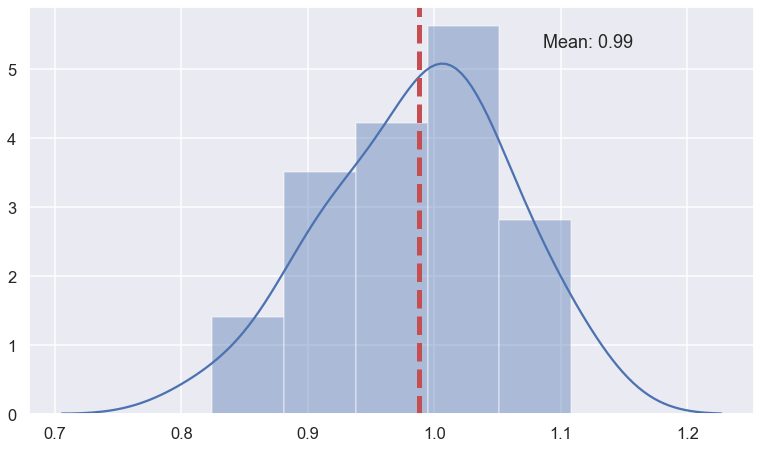

In [209]:
#Vẽ histogram của mẫu mới sinh ra ( có đường phân phối chuẩn và số mean)
plot_distribution(samples)

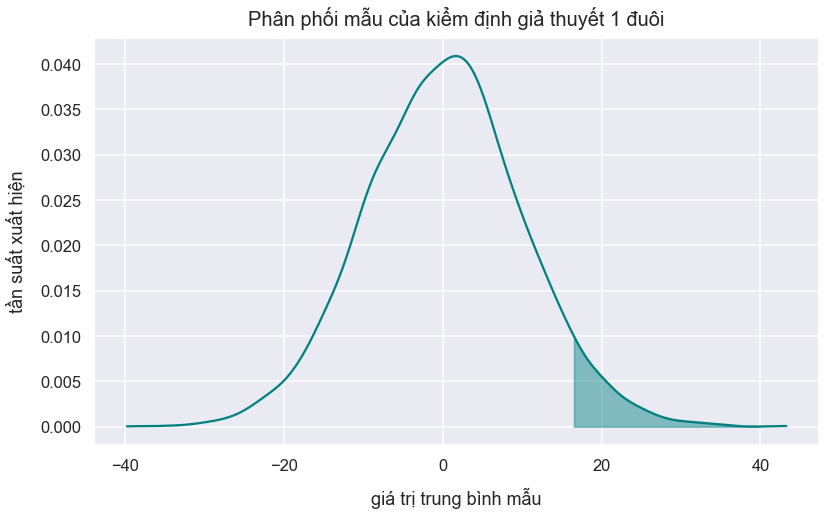

In [210]:
#Sinh ngẫu nhiên 6000 mẫu theo phân phối chuẩn có mean = 0 và std = 10
samples = np.random.normal(loc=0, scale=10, size=6000)
#Minh họa một đuôi và mức alpha = 0.05
two_std_from_mean = np.mean(samples) + np.std(samples)*1.645
#kernel density
kde = stats.gaussian_kde(samples)
#Trả về 10000 giá trị phân bố bằng nhau trong khoảng từ min tới max của samples 
pos = np.linspace(np.min(samples), np.max(samples), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Phân phối mẫu của kiểm định giả thuyết 1 đuôi", y=1.015, fontsize=20)
plt.xlabel("giá trị trung bình mẫu", labelpad=14)
plt.ylabel("tần suất xuất hiện", labelpad=14);

In [211]:
# Sử dụng hình minh họa
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032933/Screenshot37.png", width=300, height=300)

In [212]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032937/Screenshot39.png", width=300, height=300)

In [213]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032935/Screenshot38.png", width=300, height=300)

# T test one tailed for one sample
 Is the average capacity of batteries less than 140 ampere-hours? A random sample of 20 batteries had a mean of 138.47 and a standard deviation of 2.66. Assume a normal distribution. Test at the .05 level of significance. One-Tailed t Test
Solution

  One-Tailed t Test Solution
H0: μ = 140

Ha: μ < 140

α = .05

df =20 – 1 = 19  

Critical Value(s):

Test Statistic:
 Hệ số sig = 0.05
Chỉ số t tương ứng với hệ số sig ở trên là -1.729
t = ( x̄ – μ) / (s / √n)
Áp dụng với các giá trị nêu trên:

X¯¯¯¯ = 138.47
μ = 140
σ = 2.66
α = 0.05 
df = 20 - 1
t = -2.57
Giá trị t = -2.57 < -1.729 nên có bằng chứng để bác bỏ giả thuyết  H0.

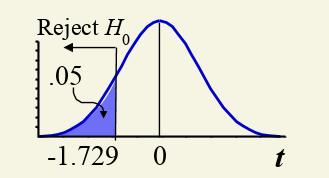

In [225]:
Image(r"C:\Users\Administrator\Downloads\download.png", width=300, height=300)

In [226]:
#Sinh ngẫu nhiên một mẫu 25 phần tử có trung bình mẫu là 138.47, độ lệch chuẩn là 2.66
we = np.random.normal(138.47, 2.66, 20)
print(samples[:10])

[ 9.99857268  4.31436252 -0.33498329 -3.2127979  18.66023956  1.27316167
 -5.65539124 13.67858918  2.36595629 -8.00838339]


In [227]:
#Xác định các thông số
alpha = 0.05

In [228]:
#Kiểm định t one sample
ttest_Score, p_value = st.ttest_1samp(we, 140)
print('t = ',ttest_Score,', p = ',p_value)
if(p_value <  alpha):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  -2.1471283199157516 , p =  0.044901561691681205
Có bằng chứng để bác bỏ giả thuyết H0


In [229]:
# T test one tailed for two samples
                         Small-Sample Test
Example

You’re a financial analyst for Charles Schwab. Is there a difference in dividend yield between stocks listed on the NYSE and NASDAQ? You collect the following data:

          NYSE               NASDAQ
Number     11                  15

Mean      3.27                2.53

Std Dev  1.30                 1.16

Assuming normal populations, And population variances are equal is there a difference in average yield (α = .05)?

H0 : μ1 – μ2 = 0 (μ1 = μ2)

Ha : μ1 – μ2 ≠ 0 (μ1 ≠ μ2)

α = .05

df = 11 + 15 – 2 = 24

Critical Value(s): 
 Hệ số sig = 0.05
Chỉ số t tương ứng với hệ số sig ở trên là +2.064 và -2.064

Áp dụng với các giá trị vào công thức tính t - score cho mẫu đa, ta có:


t = 1.53

Giá trị t = 1.53 < 2.064 nên không đủ bằng chứng để bác bỏ giả thuyết  H0.
.

IndentationError: unexpected indent (<ipython-input-229-1bb1df3469c6>, line 2)

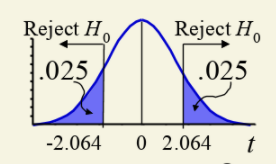

In [230]:
Image(r"C:\Users\Administrator\Downloads\Capture.PNG", width=300, height=300)

In [240]:
#Lập trình python minh họa
#Sinh ngẫu nhiên NYSE có 11 phần tử với mean = 3.27 std = 1.3
NYSE = np.random.normal(3.27, 1.3, 11)
print(NYSE[:10])

[2.94704006 1.72319096 3.80502581 4.94462775 3.70223595 2.05196451
 4.41604864 0.22483346 4.22567399 2.83734469]


In [241]:
#Sinh ngẫu nhiên  NASDAQ có 15 phần tử với mean = 2.53 std = 1.16
NASDAQ = np.random.normal(2.53, 1.16, 15)
print(NASDAQ[:10])

[2.38487952 2.56390474 1.98288833 2.3352848  3.27433611 1.04157823
 2.15579526 2.87050383 2.7339575  3.76433031]


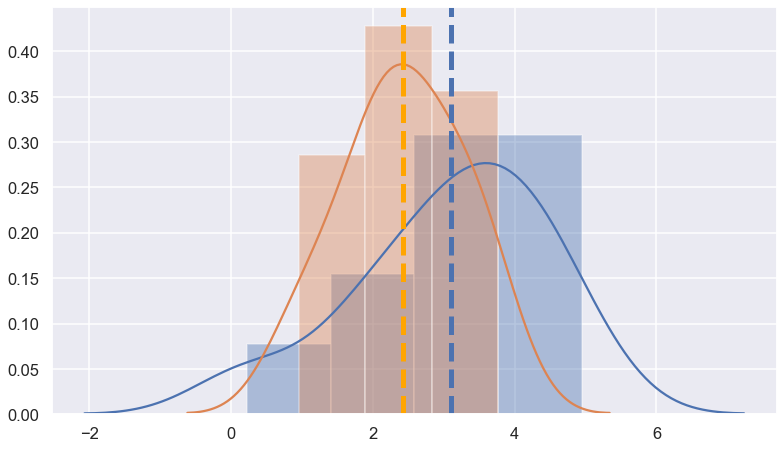

In [242]:
# Vẽ biểu đồ của 2 mẫu mới sinh

plt.figure()
ax1 = sns.distplot(NYSE)
ax2 = sns.distplot(NASDAQ)
plt.axvline(np.mean(NYSE), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(NASDAQ), color='orange', linestyle='dashed', linewidth=5)

In [243]:
#Kiểm định giả thuyết 
alpha = 0.05
ttest_score, p_value = stats.ttest_ind(NYSE, NASDAQ)
print('t = ', ttest_score, '; p = ', p_value)
if(p_value <  alpha/2):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  1.551414321197946 ; p =  0.13389047596228515
Chưa có bằng chứng để bác bỏ giả thuyết H0


In [244]:
#Kiểm định giả thuyết 
ttest_score, p_value = stats.ttest_ind(NASDAQ, NYSE)
print('t = ', ttest_score, '; p = ', p_value)
if(p_value <  alpha/2):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  -1.551414321197946 ; p =  0.13389047596228515
Chưa có bằng chứng để bác bỏ giả thuyết H0
